In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df =pd.read_csv("D:/dataset/ecommerce_sales_34500.csv")
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female


In [3]:
df.shape

(34500, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [5]:
df["order_date"]=pd.to_datetime(df["order_date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            34500 non-null  object        
 1   customer_id         34500 non-null  object        
 2   product_id          34500 non-null  object        
 3   category            34500 non-null  object        
 4   price               34500 non-null  float64       
 5   discount            34500 non-null  float64       
 6   quantity            34500 non-null  int64         
 7   payment_method      34500 non-null  object        
 8   order_date          34500 non-null  datetime64[ns]
 9   delivery_time_days  34500 non-null  int64         
 10  region              34500 non-null  object        
 11  returned            34500 non-null  object        
 12  total_amount        34500 non-null  float64       
 13  shipping_cost       34500 non-null  float64   

In [7]:
## checking null value 
df.isnull().sum()

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64

In [8]:
## duplicates checking
Dups = df.duplicated(subset =['order_id','product_id','customer_id']).sum()

print(f'In this data {Dups} duplicates value found')

In this data 0 duplicates value found


In [9]:
## creating the  new columns for order date
df['Year'] =df['order_date'].dt.year
df['Month'] =df['order_date'].dt.month
df['Month_name'] =df['order_date'].dt.month_name()
df['Quarter'] =df['order_date'].dt.quarter

In [10]:
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,...,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,Year,Month,Month_name,Quarter
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,...,No,139.47,7.88,31.17,60,Female,2023,12,December,4
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,...,No,24.73,4.60,-2.62,37,Male,2025,4,April,2
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,...,No,166.80,6.58,13.44,34,Male,2024,10,October,4
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,...,No,63.67,5.50,2.14,21,Female,2024,9,September,3
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,...,No,13.88,2.74,1.15,39,Male,2024,12,December,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,...,No,8.35,3.04,-0.12,23,Female,2025,8,August,3
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,...,Yes,21.56,3.37,6.33,61,Female,2023,12,December,4
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,...,No,1618.20,12.18,182.00,41,Female,2025,2,February,1
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,...,No,21.94,5.61,0.53,27,Female,2024,3,March,1


In [11]:
df.describe()

,price,discount,quantity,order_date,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age,Year,Month,Quarter
count,34500.000000,34500.000000,34500.000000,34500,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,2024-09-13 13:39:17.843478272,4.814203,170.008494,6.152120,28.116505,43.474377,2024.200319,6.547449,2.516638
min,1.010000,0.000000,1.000000,2023-09-12 00:00:00,3.000000,0.820000,0.000000,-6.200000,18.000000,2023.000000,1.000000,1.000000
25%,16.690000,0.000000,1.000000,2024-03-14 00:00:00,4.000000,19.710000,4.420000,1.500000,31.000000,2024.000000,4.000000,2.000000
50%,45.660000,0.000000,1.000000,2024-09-16 00:00:00,5.000000,56.820000,6.090000,10.550000,43.000000,2024.000000,7.000000,3.000000
75%,130.950000,0.100000,2.000000,2025-03-17 00:00:00,6.000000,168.530000,7.830000,33.132500,56.000000,2025.000000,10.000000,4.000000
max,2930.470000,0.300000,5.000000,2025-09-11 00:00:00,13.000000,12931.800000,15.650000,1536.170000,69.000000,2025.000000,12.000000,4.000000
std,195.620477,0.069894,0.932270,NaN,1.242141,357.503014,2.389539,53.352947,14.980682,0.680645,3.445885,1.116733


C:\Users\ZORO\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\ZORO\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


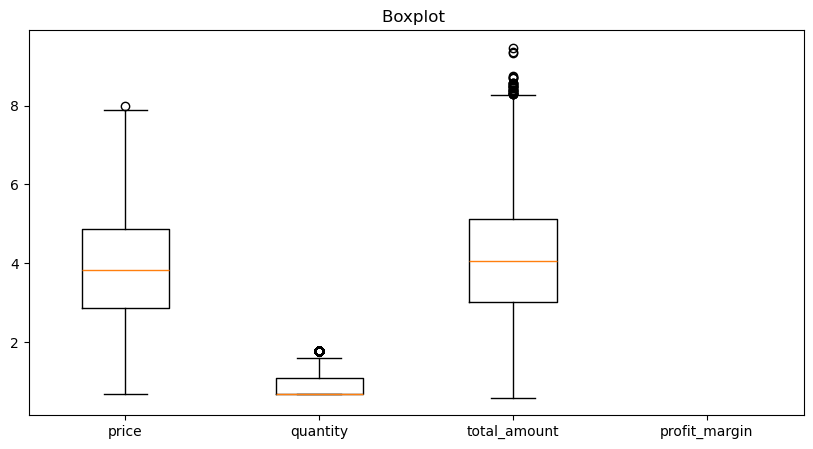

In [12]:
## outlier checking

number =['price','quantity','total_amount','profit_margin']

plt.figure(figsize=(10,5))
plt.boxplot(np.log1p(df[number]))
plt.xticks(range(1, len(number) + 1), number)
plt.title("Boxplot ")
plt.show()

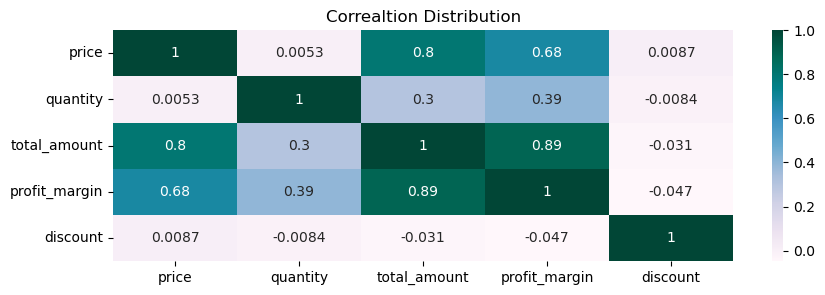

In [13]:
## correlation 
numberX =['price','quantity','total_amount','profit_margin' ,'discount']
plt.figure(figsize=(10,3))
sns.heatmap(df[numberX].corr(),annot=True , cmap ='PuBuGn')
plt.title("Correaltion Distribution")
plt.show()

In [14]:
## Data validation
df['Expected amount'] =df['price']*df['quantity']
df[['total_amount', 'Expected amount']].head()

,total_amount,Expected amount
0,139.47,164.08
1,24.73,24.73
2,166.80,175.58
3,63.67,63.67
4,13.88,16.33


In [15]:
df['category'].unique()

array(['Home', 'Grocery', 'Electronics', 'Beauty', 'Fashion', 'Toys',
       'Sports'], dtype=object)

## EDA

In [17]:
## kpi
Total_Sales = df['total_amount'].sum()
Total_orders =df.shape[0]
avg_order_Sales =df['total_amount'].mean()

print(f'Total sales : {Total_Sales.round()}')
print(f'Total orders : {Total_orders}')
print(f'Avg _order sales : {avg_order_Sales.round()}')

Total sales : 5865293.0
Total orders : 34500
Avg _order sales : 170.0


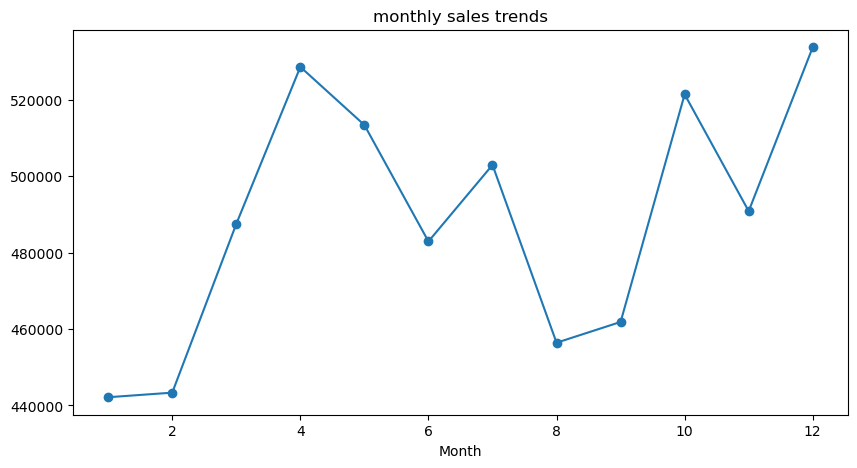

In [18]:
## Sales Trends over time
monthly_Sales =df.groupby('Month')['total_amount'].sum()

plt.figure(figsize=(10,5))
monthly_Sales.plot(kind='line',marker ="o")

plt.title("monthly sales trends")
plt.show()

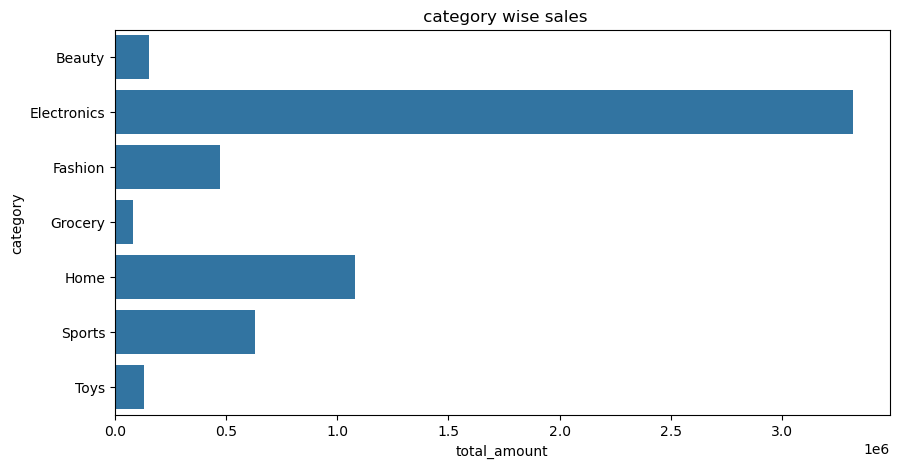

In [19]:
## Category wise Sale
category_Sales = df.groupby('category', as_index=False)['total_amount'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x='total_amount' ,y ='category' ,data= category_Sales)
plt.title(" category wise sales")
plt.show()

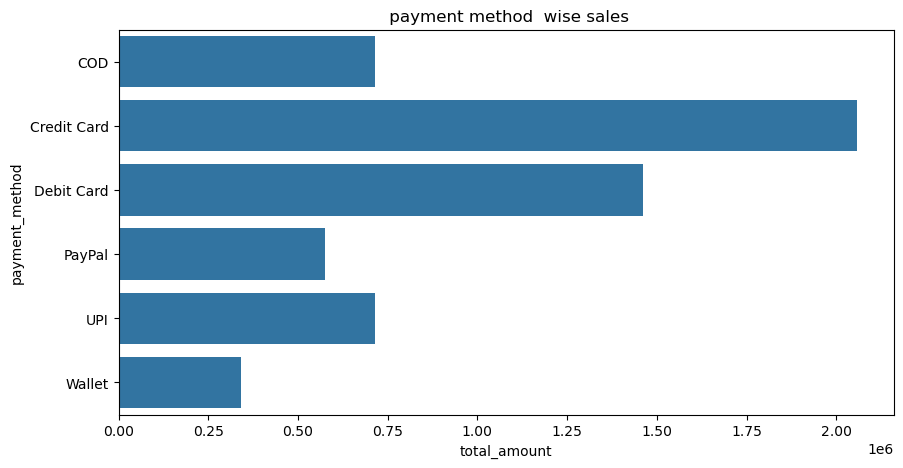

In [20]:
## Payment method  wise Sale
payment_mehtod = df.groupby('payment_method', as_index=False)['total_amount'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x='total_amount' ,y ='payment_method' ,data= payment_mehtod)
plt.title(" payment method  wise sales")
plt.show()

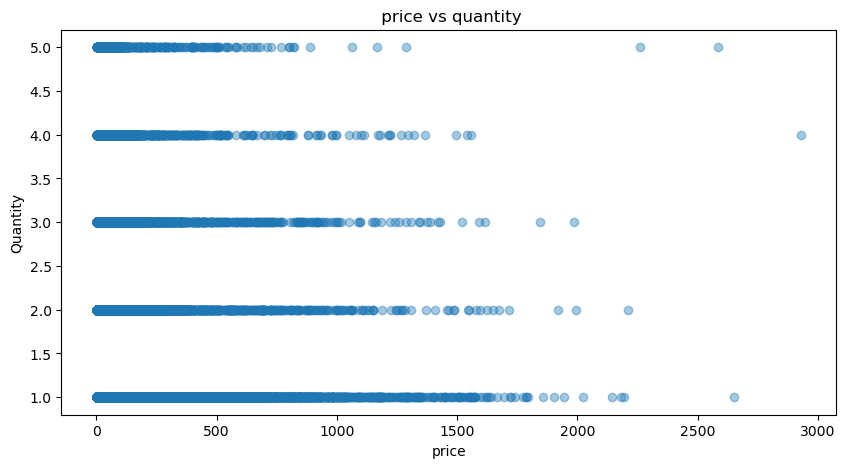

In [21]:
## price vs qantity 

plt.figure(figsize=(10,5))
plt.scatter(df['price'] ,df['quantity'] ,alpha=0.4)
plt.title(" price vs quantity")
plt.xlabel("price")
plt.ylabel('Quantity')
plt.show()

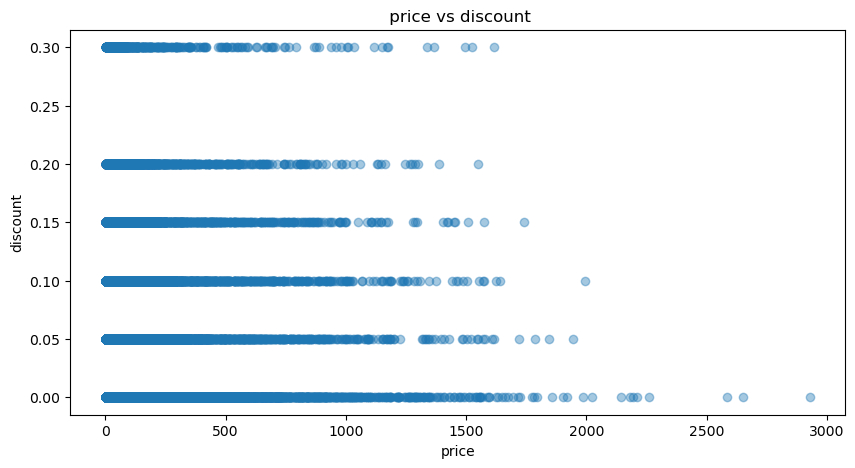

In [48]:
## price vs Discount
plt.figure(figsize=(10,5))
plt.scatter(df['price'] ,df['discount'] ,alpha=0.4)
plt.title(" price vs discount")
plt.xlabel("price")
plt.ylabel('discount')
plt.show()

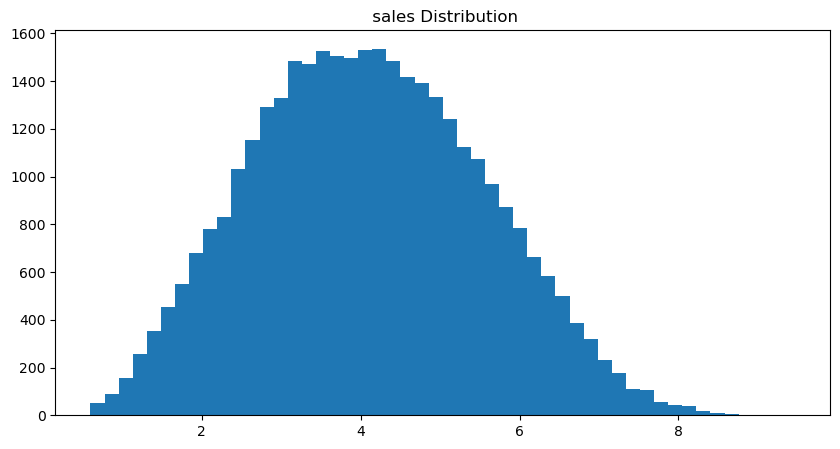

In [22]:
# sales distribution

plt.figure(figsize=(10,5))
plt.hist(np.log1p(df['total_amount']) ,bins =50)
plt.title(" sales Distribution")
plt.show()

## Modeling 

In [56]:
# selecting feature &  target 
X =df[['price' ,'quantity','discount' ,'category']]
X =pd.get_dummies(X ,drop_first=True)

y =df["total_amount"]


In [68]:
# training  and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score

X_train ,X_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.3 )

### linear regression

In [70]:

from sklearn.linear_model import LinearRegression
model =LinearRegression()
model_lr =model.fit(X_train ,y_train)

In [72]:
y_pred =model_lr.predict(X_test)
y_pred

array([ 90.90916481, 228.38737344,  18.78872908, ..., 362.89663936,
       141.8053259 , 265.677523  ])

In [74]:
MAE =mean_absolute_error(y_test ,y_pred)
RMSE =np.sqrt(mean_squared_error(y_test ,y_pred))
R2score =r2_score(y_test ,y_pred)

In [84]:
print(f' Meam abosulte error : {MAE.round()}')
print(f' Root mean sqaured error : {RMSE.round()}')
print(f' R2score : {R2score}')

 Meam abosulte error : 83.0
 Root mean sqaured error : 205.0
 R2score : 0.7186378588086915
